## Lab 2 - Part 1:
### Pikachu and Pichu - Datapoints. Classification exercise
 
- Task is to make a simple algo that can take user input and predict if it is one or the other.
- I will be using the mean position of Pikachu and Pichu and use Euclidian distance calculate to which the new point is closest to.
- For part 2 I will try out some more advanced models with scikit learn.
 

### Import modules
 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [5]:
datapoints = pd.read_csv("datapoints.txt")
datapoints.head(), datapoints.columns

(   (width (cm)   height (cm)   label (0-pichu   1-pikachu))
 0    21.959384     31.239567                0           NaN
 1    23.635916     36.468215                1           NaN
 2    17.714056     31.441704                0           NaN
 3    21.780200     33.213398                1           NaN
 4    25.206306     36.558816                1           NaN,
 Index(['(width (cm)', ' height (cm)', ' label (0-pichu', ' 1-pikachu))'], dtype='object'))

In [6]:
# Cleaning up the columns, removing unnecessary spaces and text. 
# Dropping  "  1-pikachu))'" NaN Column. Renaming target column to Pika1/Pichu0
datapoints_new = datapoints.drop([" 1-pikachu))"], axis=1)
datapoints_new.rename(columns={"(width (cm)": "Width", " height (cm)": "Height", " label (0-pichu": "Pika1/Pichu0"}, inplace= True)
datapoints_new.head()


,Width,Height,Pika1/Pichu0
0,21.959384,31.239567,0
1,23.635916,36.468215,1
2,17.714056,31.441704,0
3,21.780200,33.213398,1
4,25.206306,36.558816,1


In [7]:
datapoints_new.describe()
# Dataset is balanced 50/50 with Pikachu Pichu.

,Width,Height,Pika1/Pichu0
count,150.000000,150.000000,150.000000
mean,22.062142,33.598281,0.500000
std,2.497307,2.159651,0.501675
min,16.866105,28.888134,0.000000
25%,19.921975,32.005462,0.000000
50%,22.040754,33.315877,0.500000
75%,24.316733,35.320895,1.000000
max,27.194384,40.147170,1.000000


### Prepare Data

In [8]:
# Separate Pikachu and Pichu

# Only Pika
pikachu = datapoints_new[datapoints_new["Pika1/Pichu0"] == 1]

# Mean() Pikachu Position for X and Y
xpika = pikachu['Width'].mean()
ypika = pikachu['Height'].mean() 


# Only pichu
pichu = datapoints_new[datapoints_new["Pika1/Pichu0"] == 0]

# Mean() Pichu Position for X and Y
xpichu = pichu['Width'].mean()
ypichu = pichu['Height'].mean() 



# ---------------- For Visualization later in subplots----------------
# Data frame for test points
data_test_points = [[25, 32, 1], [24.2, 31.5, 1], [22, 34, 1], [20.5, 34, 0]]
testpoints = pd.DataFrame(data_test_points, columns=["Width", "Height", "Pika1/Pichu0"])

# Data frame for mean() points
mean_points = [[xpika, ypika, 1], [xpichu, ypichu, 0]]
mean_points = pd.DataFrame(mean_points, columns=["Width", "Height", "Pika1/Pichu0"])





### Algoritm using the Euclidian distance
Simple algoritm. Using the mean of all pikachus and Pichu points to calculate the distance to the new input test points. The shorter distance decides

In [9]:
# Will prompt the user for X (width) and then Y(height)
import math

result = []
while True:
    try:
        user_x = float(input("Type width(x): "))
        user_y = float(input("Type in height(y): "))
        break
    except ValueError:
        print("Use only numbers with or without decimals.")
        break


a = (xpika-user_x)**2 + (ypika-user_y)**2
distpika = math.sqrt(a)

b = (xpichu-user_x)**2 + (ypichu-user_y)**2
distpichu = math.sqrt(b)

if distpika > distpichu:
    print(f"Width: {user_x} and Height: {user_y}. Pichu!")
        
else:
    print(f"Width: {user_x} and Height: {user_y}. Pikachu!")
        

#Test points with answers:
#1. (25, 32) - pika
#2. (24.2, 31.5) - pika
#3. (22, 34) - pika
#4. (20.5, 34) - pichu



Width: 20.5 and Height: 34.0. Pichu!


### Visualize the data
Subplots for main data set, mean points and test points.

(25.0, 45.0)

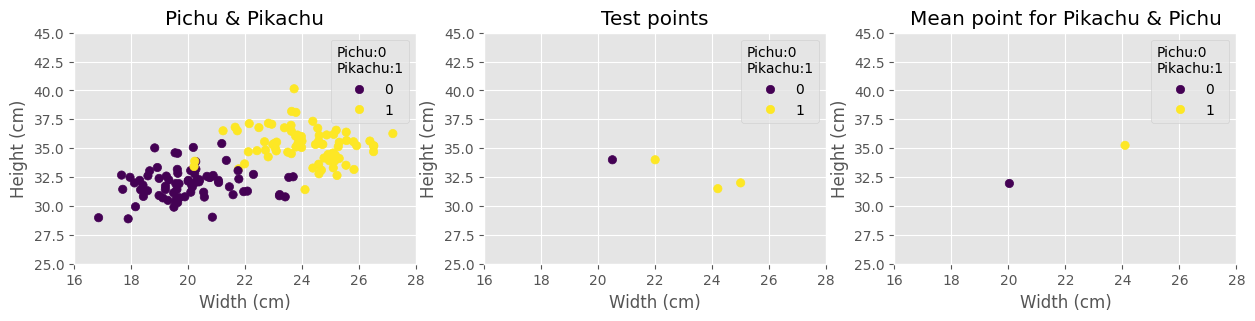

In [10]:
# plt.style.use('default')
plt.style.use('ggplot')

# Create the plot with subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 3,))

# ---------- first ax1 plot -------------
scatter1 = ax1.scatter(datapoints_new["Width"], 
                     datapoints_new["Height"], 
                     c=datapoints_new["Pika1/Pichu0"])

# ax1 Customization
ax1.set(title="Pichu & Pikachu",
       xlabel="Width (cm)",
       ylabel="Height (cm)")
ax1.legend(*scatter1.legend_elements(), title="Pichu:0\nPikachu:1")

ax1.set_xlim([16, 28]) 
ax1.set_ylim([25, 45])


# --------- second ax2 plot ------------------
scatter2 = ax2.scatter(testpoints["Width"], #  testpoints is the dataset we prepared earlier.
                     testpoints["Height"], 
                     c=testpoints["Pika1/Pichu0"])

# ax2 Customization
ax2.set(title="Test points",
       xlabel="Width (cm)",
       ylabel="Height (cm)")
ax2.legend(*scatter2.legend_elements(), title="Pichu:0\nPikachu:1")

ax2.set_xlim([16, 28]) 
ax2.set_ylim([25, 45])

# --------- third ax3 plot ------------------
scatter3 = ax3.scatter(mean_points["Width"], #  testpoints is the dataset we prepared earlier.
                     mean_points["Height"], 
                     c=mean_points["Pika1/Pichu0"])

# ax2 Customization
ax3.set(title="Mean point for Pikachu & Pichu",
       xlabel="Width (cm)",
       ylabel="Height (cm)")
ax3.legend(*scatter3.legend_elements(), title="Pichu:0\nPikachu:1")

ax3.set_xlim([16, 28]) 
ax3.set_ylim([25, 45])

* (left):  Our given datapoints with Pikachu and Pichu. There are some outliers which would not have been labeled correctly using 
the simple  "Euclid" algo.

* (middle): The position of the given test points.

* (right): The mean points for Pikachu and Pichu.


The algo predicted correct on the given test points. Point (22, 34) passed but looking at the plots, it was by a slim margin.

## Lab 2 - Part 2:
Use the nearest 10 points to predict Pikachu or Pichu.

I will run a test using "K-Nearest Neighbors" (n_neighbor value at 10) machine model through the scikit module.

### Split data for training
We split the data into X and Y.

X will be our width and height columns.

Y will be our target. 0 or 1 indicating either Pikachu or Pichu.

In [11]:
X = datapoints_new.drop("Pika1/Pichu0", axis=1) # all columns except our target column = y
y = datapoints_new["Pika1/Pichu0"] # our target column (we want to predict y using X)

### Model K-nearest Neighbor

The data is split into a training set (100) and test set (50).

10 randomized training sets are then plotted through a for loop.

[0.9, 0.94, 0.98, 0.98, 0.94, 0.96, 0.94, 0.96, 0.96, 0.96]
Mean accuracy of 10 randomized training sets: 95.19999999999999%


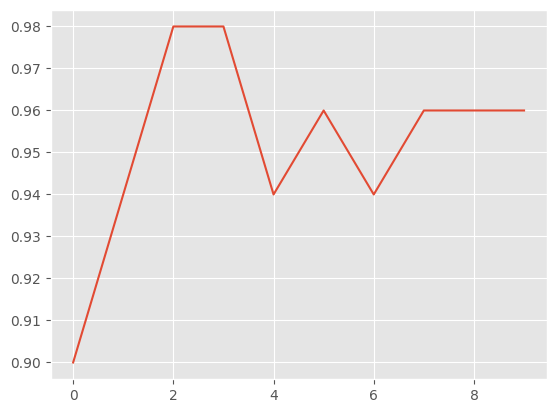

In [12]:
# The total data is 150 points. The task asks us to divide 100 to training and use
# 50 as test data. Randomly. So we set our test_size parameter to 50.
# https://www.sharpsightlabs.com/blog/scikit-train_test_split/

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 10 randomized tests through a for loop
clf = KNeighborsClassifier(n_neighbors=10) # n_neighbors = 10 closest.

results = []
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 50) # Testsize set to 50, which leaves 100 to train on.
    clf.fit(X_train, y_train) # We apply the model
    score = clf.score(X_test, y_test) # Accuracy score, stored in a list.
    results.append(score)


mean = sum(results)/len(results)
print(results)
print(f"Mean accuracy of 10 randomized training sets: {mean*100}%")
plt.plot(results);

### Evaluate and Analyze

In [13]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
clf = KNeighborsClassifier(n_neighbors=10) 

# Set random_state to 42, for a fixed seed. So we can tune and analyze on the same training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 50, random_state=42) 
clf.fit(X_train, y_train)
score_randomstate_42 = clf.score(X_test, y_test)
print(f"Score for randomstate 42 test: {score_randomstate_42*100}%")

# Make predictions on test data and save them
y_preds = clf.predict(X_test)

Score for randomstate 42 test: 96.0%


In [29]:
# Create a confusion matrix using the confusion_matrix function
confusion_matrix(y_test, y_preds)

array([[25,  0],
       [ 2, 23]], dtype=int64)

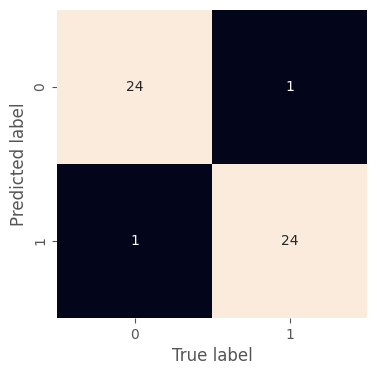

In [21]:
# Import seaborn for improving visualisation of confusion matrix
import seaborn as sns

# Make confusion matrix more visual
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False) # Annotate the boxes
plt.xlabel("True label")
plt.ylabel("Predicted label");


In [22]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.96      0.96      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## Further Testing
Could inlude:
- Trying different values on n_neighbors parameter. Loop a range and store results.
- Hyper parameter tuning using gridsearch.
- Trying different testsize ratios.
- Adding more data.

### Let's run our user input again and try it on the model.

In [23]:
# Lets try to predict
test_input = [[25, 32], [24.2, 31.5], [22, 34], [20.5, 34]]  
four_test_points = pd.DataFrame(test_input, columns=['Width', 'Height'])

y_preds = clf.predict(four_test_points)

print(f"Testing 4 samples: {test_input}")
print(y_preds)

Testing 4 samples: [[25, 32], [24.2, 31.5], [22, 34], [20.5, 34]]
[1 1 1 0]


### Results

Correct should be pika(1) - pika(1) - pika(1) - pichu(0).

After experimenting with n_neighbors parameter, value of 20 would give the correct output more often.
